![portada](images/boston.png)

# Boston Housing Mini Project

## ¿Qué tienes que hacer?
- Explorar el dataset
- Buscar correlación entre variables
- Hacer plots explicativos de tus hipótesis
- Entender las variables
- Probar modelos de regresión con todas, algunas o una variable ... (según consideres)
- Revisar las métricas aprendidas en clase (R2 y R2ajustado)
- ¡¡Practicar lo que hemos visto en clase!!
- Sobre todo, disfrutar y subirte en el cohete 🚀🔥

#Legend
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per 10,000 dollars
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in 1000's dollars

### Librerías

Recordad que lo primero es importar las librerías

In [1]:
#importa aquí todo lo que necesites
import pandas as pd
from sklearn.datasets import load_boston
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
%matplotlib inline
import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

### Datitos

Os dejamos los datos cargados 🏡

In [2]:
boston_dataset = load_boston()

In [3]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
boston['MEDV'] = boston_dataset.target

In [5]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [63]:
#drop MEDV =>50
boston2 = boston.drop(boston[boston.MEDV >= 50.0].index)

In [64]:
boston2.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,best_prediction,best_prediction_error
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.00000,490.000000,490.000000,490.000000,490.000000,490.000000,490.00000,490.000000,490.000000,490.000000
mean,3.643241,11.112245,11.113143,0.059184,0.554307,6.245471,68.27898,3.834519,9.514286,408.002041,18.520000,355.855449,12.92402,21.635918,10.543850,-0.568395
std,8.722154,22.844626,6.821302,0.236209,0.116688,0.653147,28.16479,2.109948,8.691297,168.065190,2.110478,92.634273,7.08318,7.865301,7.189156,20.991917
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.90000,1.137000,1.000000,187.000000,12.600000,0.320000,1.98000,5.000000,-4.661952,-80.348637
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.881000,44.55000,2.111050,4.000000,280.250000,17.400000,375.912500,7.34750,16.700000,6.032251,-1.701176
50%,0.247510,0.000000,9.690000,0.000000,0.538000,6.185000,76.80000,3.275900,5.000000,330.000000,19.100000,391.770000,11.67500,20.900000,9.871195,6.123654
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.578000,93.87500,5.214600,24.000000,666.000000,20.200000,396.322500,17.11750,24.675000,13.321675,10.602423
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.00000,12.126500,24.000000,711.000000,22.000000,396.900000,37.97000,48.800000,35.372755,34.915738


In [65]:
boston2.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,best_prediction,best_prediction_error
CRIM,1.000000,-0.199075,0.408053,-0.064210,0.420476,-0.219307,0.353751,-0.382231,0.627434,0.583711,0.287079,-0.384460,0.461755,-0.450115,-0.450115,0.062492
ZN,-0.199075,1.000000,-0.527121,-0.053911,-0.512137,0.310506,-0.563184,0.673227,-0.307726,-0.302897,-0.381815,0.176117,-0.422090,0.404608,0.404608,-0.949691
INDUS,0.408053,-0.527121,1.000000,0.035815,0.765155,-0.412413,0.637970,-0.710284,0.596124,0.717678,0.387656,-0.363394,0.636527,-0.600005,-0.600005,0.368158
CHAS,-0.064210,-0.053911,0.035815,1.000000,0.085619,0.044979,0.071194,-0.077705,-0.032786,-0.067743,-0.116830,0.041707,-0.006486,0.074803,0.074803,0.084287
NOX,0.420476,-0.512137,0.765155,0.085619,1.000000,-0.322609,0.727671,-0.768122,0.612160,0.667380,0.188381,-0.383087,0.612444,-0.524451,-0.524451,0.377727
RM,-0.219307,0.310506,-0.412413,0.044979,-0.322609,1.000000,-0.268464,0.245789,-0.195768,-0.281955,-0.293299,0.119204,-0.610369,0.686634,0.686634,-0.102758
AGE,0.353751,-0.563184,0.637970,0.071194,0.727671,-0.268464,1.000000,-0.743043,0.451939,0.499682,0.268459,-0.279002,0.637879,-0.492915,-0.492915,0.444079
DIS,-0.382231,0.673227,-0.710284,-0.077705,-0.768122,0.245789,-0.743043,1.000000,-0.491875,-0.532025,-0.246773,0.299426,-0.536493,0.368813,0.368813,-0.606337
RAD,0.627434,-0.307726,0.596124,-0.032786,0.612160,-0.195768,0.451939,-0.491875,1.000000,0.909000,0.456035,-0.451534,0.510192,-0.476296,-0.476296,0.171767
TAX,0.583711,-0.302897,0.717678,-0.067743,0.667380,-0.281955,0.499682,-0.532025,0.909000,1.000000,0.452252,-0.448211,0.566467,-0.572442,-0.572442,0.133584


In [66]:
#Looking for correlations between variables
#per crime capita rate? does it affect/impact median value of owner-occupied homes in 1000's dollars
lr = LinearRegression()
lr.fit(
    X = boston2[['MEDV']],
    y = boston2.CRIM
)

LinearRegression()

In [67]:
lr.intercept_

14.442834624987007

In [68]:
lr.coef_

array([-0.49915113])

In [75]:
boston2["best_prediction"] = boston2.MEDV * lr.coef_ + lr.intercept_

In [76]:
boston2["best_prediction_error"] = (boston2.best_prediction - boston2.CRIM)

In [77]:
boston2.best_prediction_error.mean()

4.640279090678206e-16

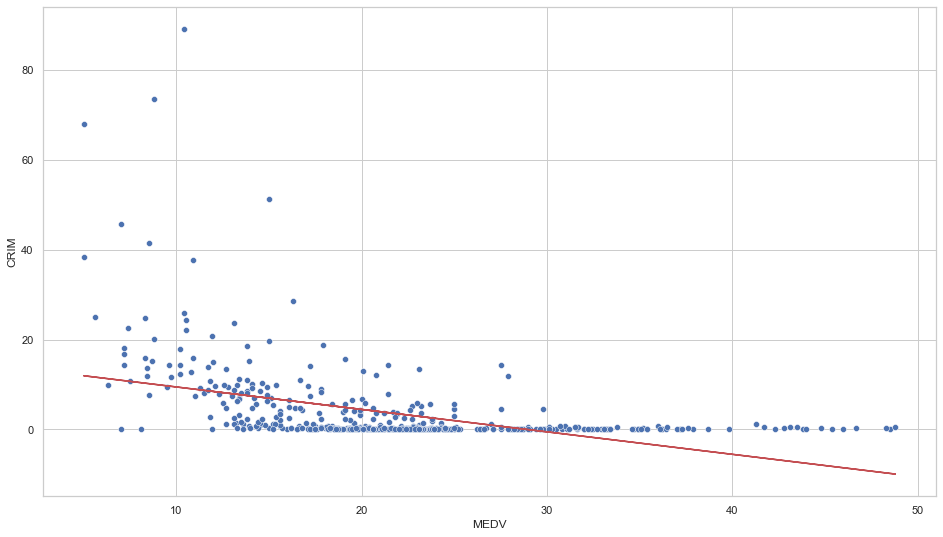

In [78]:
fig, ax = plt.subplots()
sns.scatterplot(x=boston2['MEDV'], y=boston2['CRIM'])
plt.plot(boston2['MEDV'], boston2.best_prediction, color='r', label='best')

In [79]:
#RAD - index access to highways  
#and MEDV - Median value of owner-occupied homes in 1000's dollars
lr = LinearRegression()
lr.fit(
    X = boston2[['MEDV']],
    y = boston2.RAD
)

LinearRegression()

In [80]:
lr.intercept_

20.901596067562114

In [81]:
lr.coef_

array([-0.52631509])

In [83]:
boston2["best_prediction"] = boston2.MEDV * lr.coef_ + lr.intercept_

In [84]:
boston2["best_prediction_error"] = (boston2.best_prediction - boston2.RAD)

In [85]:
boston2.best_prediction_error.mean()

-4.640279090678206e-16

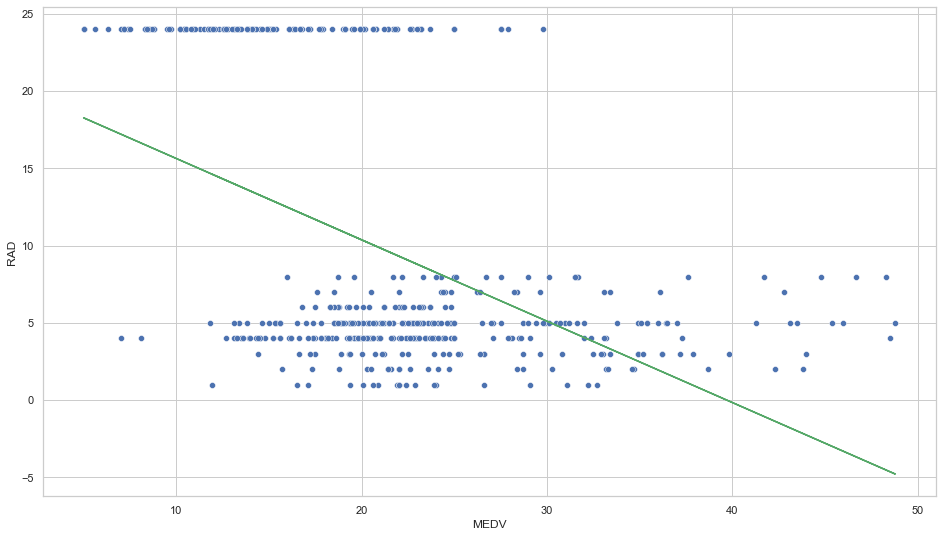

In [86]:
fig, ax = plt.subplots()
sns.scatterplot(x=boston2['MEDV'], y=boston2['RAD'])
plt.plot(boston2['MEDV'], boston2.best_prediction, color='g', label='best')

In [87]:
#PTRATIO - pupil-teacher ratio by town
lr = LinearRegression()
lr.fit(
    X = boston2[['MEDV']],
    y = boston2.PTRATIO
)

LinearRegression()

In [88]:
lr.intercept_

21.530979228120383

In [89]:
lr.coef_

array([-0.13916577])

In [90]:
boston2["best_prediction"] = boston2.MEDV * lr.coef_ + lr.intercept_
boston2["best_prediction_error"] = (boston2.best_prediction - boston.PTRATIO)

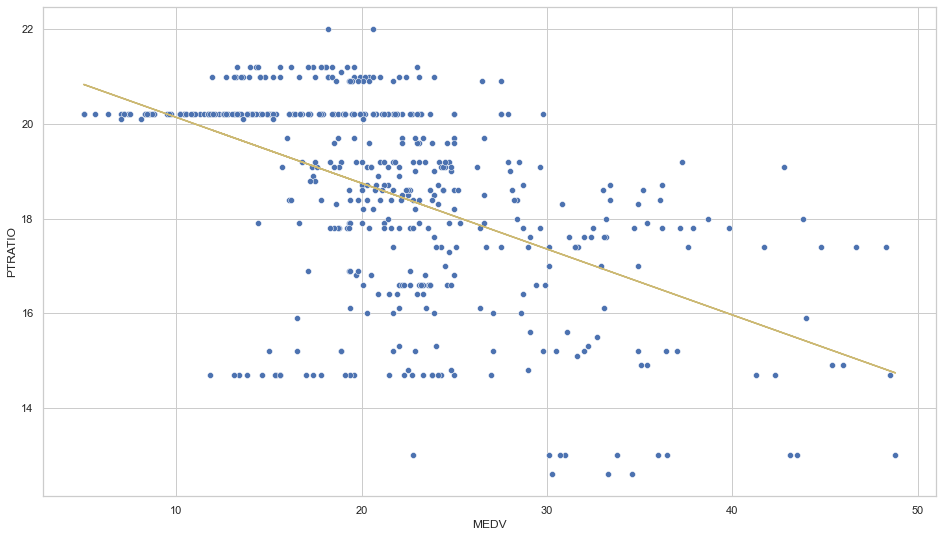

In [91]:
fig, ax = plt.subplots()
sns.scatterplot(x=boston2['MEDV'], y=boston2['PTRATIO'])
plt.plot(boston2['MEDV'], boston2.best_prediction, color='y', label='best')

In [93]:
# RM - average number of rooms per dwelling
lr = LinearRegression()
lr.fit(
    X = boston2[['MEDV']],
    y = boston2.RM
)

LinearRegression()

In [94]:
lr.intercept_

5.01180825918099

In [95]:
lr.coef_

array([0.05701922])

In [96]:
boston2["best_prediction"] = boston2.MEDV * lr.coef_ + lr.intercept_
boston2["best_prediction_error"] = (boston2.best_prediction - boston2.RM)

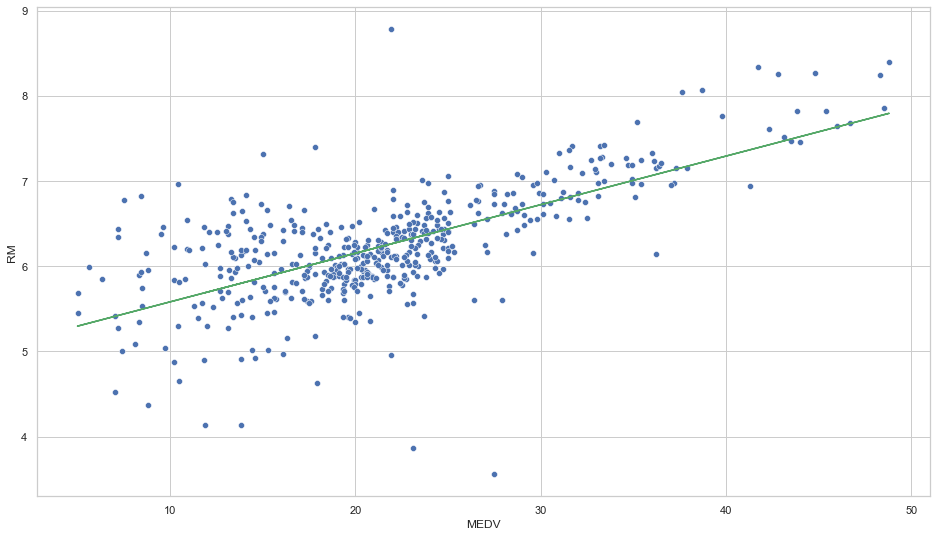

In [97]:
fig, ax = plt.subplots()
sns.scatterplot(x=boston2['MEDV'], y=boston2['RM'])
plt.plot(boston2['MEDV'], boston2.best_prediction, color='g', label='best')

In [98]:
#ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
lr = LinearRegression()
lr.fit(
    X = boston2[['MEDV']],
    y = boston2.ZN
)

LinearRegression()

In [99]:
lr.intercept_

-14.313759672644156

In [100]:
lr.coef_

array([1.17517566])

In [101]:
boston2["best_prediction"] = boston2.MEDV * lr.coef_ + lr.intercept_
boston2["best_prediction_error"] = (boston2.best_prediction - boston2.ZN)

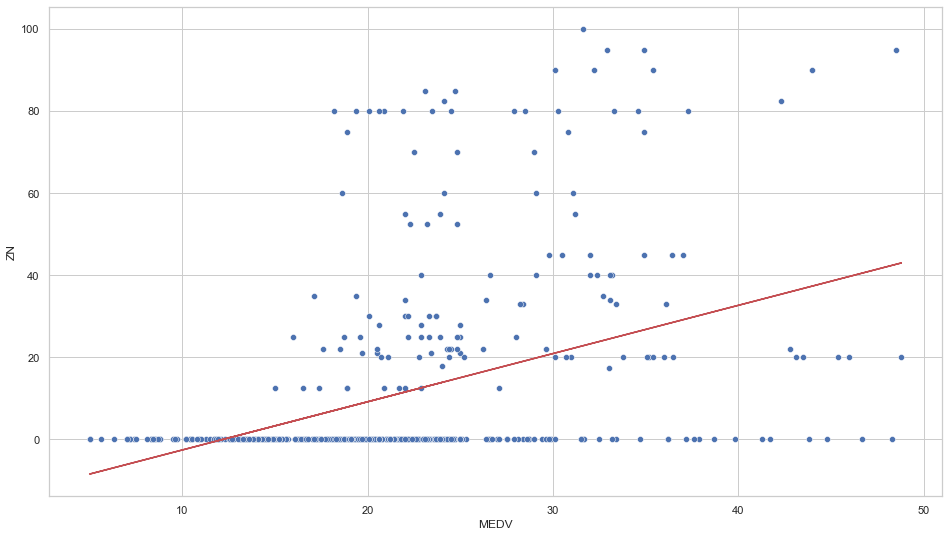

In [102]:
fig, ax = plt.subplots()
sns.scatterplot(x=boston2['MEDV'], y=boston2['ZN'])
plt.plot(boston2['MEDV'], boston2.best_prediction, color='r', label='best')

In [103]:
mod = smf.ols(formula='MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE +DIS + RAD + TAX + PTRATIO + LSTAT', data=boston2)

In [104]:
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     134.1
Date:                Wed, 25 Nov 2020   Prob (F-statistic):          2.84e-144
Time:                        12:16:56   Log-Likelihood:                -1343.9
No. Observations:                 490   AIC:                             2714.
Df Residuals:                     477   BIC:                             2768.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.5934      4.002      9.144      0.000      28.730      44.457
CRIM          -0.1180      0.026     -4.491      0.000      -0.170      -0.066
ZN             0.0357      0.011      3.131      0.002       0.013       0.058
INDUS         -0.0502      0.050     -0.995      0.320      -0.149       0.049
CHAS           0.5657      0.751      0.754      0.451      -0.909       2.041
NOX          -13.2012      3.089     -4.274      0.000     -19.271      -7.131
RM             3.6222      0.360     10.060      0.000       2.915       4.330
AGE           -0.0214      0.011     -1.987      0.047      -0.043      -0.000
DIS           -1.2215      0.163     -7.506      0.000      -1.541      -0.902
RAD            0.2370      0.054      4.418      0.000       0.132       0.342
TAX           -0.0141      0.003     -4.638      0.000      -0.020      -0.008
PTRATIO       -0.8239      0.107     -7.724      0.000      -1.034      -0.614
LSTAT         -0.3721      0.043     -8.725      0.000      -0.456      -0.288
==============================================================================
Omnibus:                       69.184   Durbin-Watson:                   1.216
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.986
Skew:                           0.876   Prob(JB):                     1.77e-25
Kurtosis:                       4.586   Cond. No.                     1.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#Remarks
- the p-value is less than 0.05 in nearly all variables -> This means % of lower status population, average number of rooms per dwelling, pupil-teacher ratio by town among others are correlated to median value of owner-occupied homes in 1000's dollars. With p-values higher than 0.05, proportion of non-retail business acres per town and age (proportion of owner-occupied units built prior to 1940) do not seem to have a clear relation with MEDV. 
- ZN(proportion of residential land zoned for lots over 25,000 sq.ft.) and RM(Average rooms per dwelling) influence MEDV positively.
- RAD (index of accessibility to radial highways ), PTRATIO (pupil-teacher ratio by town), CRIM (per capita crime rate by town) influence MEDV negatively. 

In [105]:
mod = smf.ols(formula='MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE +DIS + RAD + TAX + PTRATIO + LSTAT + B', data=boston2)

In [106]:
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     128.1
Date:                Wed, 25 Nov 2020   Prob (F-statistic):          4.33e-146
Time:                        12:17:10   Log-Likelihood:                -1337.0
No. Observations:                 490   AIC:                             2702.
Df Residuals:                     476   BIC:                             2761.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.2298      4.124      7.816      0.000      24.127      40.332
CRIM          -0.1067      0.026     -4.088      0.000      -0.158      -0.055
ZN             0.0353      0.011      3.133      0.002       0.013       0.057
INDUS         -0.0439      0.050     -0.881      0.379      -0.142       0.054
CHAS           0.4522      0.742      0.610      0.542      -1.005       1.910
NOX          -12.3981      3.057     -4.056      0.000     -18.405      -6.392
RM             3.7595      0.357     10.520      0.000       3.057       4.462
AGE           -0.0237      0.011     -2.223      0.027      -0.045      -0.003
DIS           -1.2110      0.161     -7.538      0.000      -1.527      -0.895
RAD            0.2513      0.053      4.734      0.000       0.147       0.356
TAX           -0.0138      0.003     -4.594      0.000      -0.020      -0.008
PTRATIO       -0.8382      0.105     -7.955      0.000      -1.045      -0.631
LSTAT         -0.3501      0.043     -8.234      0.000      -0.434      -0.267
B              0.0079      0.002      3.686      0.000       0.004       0.012
==============================================================================
Omnibus:                       83.998   Durbin-Watson:                   1.232
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.718
Skew:                           0.965   Prob(JB):                     7.65e-36
Kurtosis:                       5.049   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""